# <font color=black> Analysis - ICA vs iCAP in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different methods and datasets.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_
    * Analysis of spatial similarity (for a single K, or across multiple Ks)
    * Distribution across axial subdvisions (D,V,L,R) for different Ks

In [15]:
import sys,json, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
#sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')
sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

import rpy2.ipython
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector
%load_ext rpy2.ipython


%matplotlib inline
%load_ext autoreload
%autoreload 2

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<hr style="border:1px solid black">

# Initialization

### Load configuration file 

In [16]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
#with open('../config/config_spine_only_NK.json') as config_file:
 #   config = json.load(config_file)
    
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)
    

<hr style="border:1px solid black">

# Figure 1 – Defining number of components

In [17]:
perm_filename=config["main_dir"] + config["output_dir"] + "permsubjects_analysis/perm_df_paper_10sub.csv"#perm_df_paper_10sub.csv"
perm_dataframe=pd.read_csv(perm_filename,delimiter=" ")
dataframe=pd.read_csv(perm_filename,delimiter=" ")
dataframe_gva_ica=dataframe[(dataframe["method"]=="ica") & (dataframe["dataset"]=="gva")]
dataframe_gva_icap=dataframe[(dataframe["method"]=="icap") & (dataframe["dataset"]=="gva")]
dataframe_mtl_ica=dataframe[(dataframe["method"]=="ica") & (dataframe["dataset"]=="mtl")]
dataframe_mtl_icap=dataframe[(dataframe["method"]=="icap") & (dataframe["dataset"]=="mtl")]
# Add column with both dataset and methods
dataframe['method_dataset'] = dataframe.apply(lambda _: '', axis=1)
for values,index in dataframe.iterrows():#iteritems():
    for method in ["ica","icap"]:
        for dataset in ["gva","mtl"]:
            if dataframe["method"][values] == method and dataframe["dataset"][values] ==dataset:
                dataframe["method_dataset"][values]= str(method + "_"+  dataset)

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## `GVA` dataset

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4 v.s. 5: t-test independent samples with Bonferroni correction, P_val=9.150e-13 stat=-7.869e+00
5 v.s. 6: t-test independent samples with Bonferroni correction, P_val=1.972e-07 stat=5.673e+00
3 v.s. 5: t-test independent samples with Bonferroni correction, P_val=8.891e-34 stat=-1.497e+01
5 v.s. 7: t-test independent samples with Bonferroni correction, P_val=1.564e-12 stat=7.780e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4 v.s. 5: t-test independent samples with Bonferroni correction, P_val=2.095e-44 stat=-1.849e+01
5 v.s. 6: t-test independent samples with Bonferroni correction, P_val=4.350e-16 stat=9.084e+00
3 v.s. 5: t-test independent samples with Bonferroni correction, P_val=8.166e-57 stat=-2.285e

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

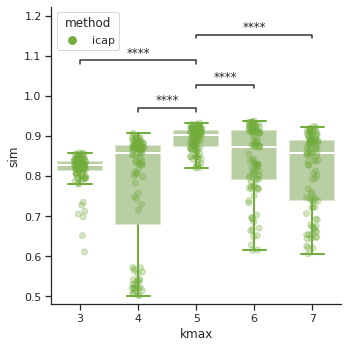

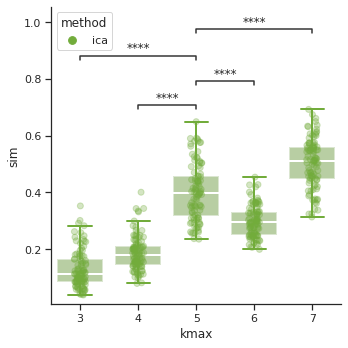

In [18]:
sns.set(style="ticks",  font='sans-serif')
colors=["#72ac3bff","#72ac3bff"]
fig = plt.figure()

dataframes=dataframe_gva_icap,dataframe_gva_ica
for i in range(len(dataframes)):
    plt.figure(i)
    
    g=sns.catplot(y="sim",x="kmax",data=dataframes[i] , kind="box", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=[colors[i]], 
             boxprops=dict(alpha=.5,edgecolor=None),whiskerprops=dict(color=colors[i]), capprops=dict(color=colors[i]), fliersize=0, aspect=1) 

    h=sns.stripplot(y="sim",x="kmax",data=dataframes[i] , hue="method", alpha=.3,
                  size=6, palette=[colors[i]], edgecolor=None,linewidth=1,dodge=True) 
     
    add_stat_annotation(h, data=dataframes[i], x="kmax", y="sim", order=dataframes[i]['kmax'].unique(),
                    box_pairs=[(dataframes[i]['kmax'].unique()[0], dataframes[i]['kmax'].unique()[2]), (dataframes[i]['kmax'].unique()[1], dataframes[i]['kmax'].unique()[2]), (dataframes[i]['kmax'].unique()[2], dataframes[i]['kmax'].unique()[3]),(dataframes[i]['kmax'].unique()[2], dataframes[i]['kmax'].unique()[4])],test='t-test_ind')


In [19]:
%%R -i dataframe_gva_icap -i dataframe_gva_ica
library(lme4); library(emmeans); library(car) #library(lmerTest); 
dataframe_gva_icap$kmax <- factor(dataframe_gva_icap$kmax) # define kmax as a factor
dataframe_gva_ica$kmax <- factor(dataframe_gva_ica$kmax) # define kmax as a factor

# Linear models with kmax as fixed factor:
print(" ")
print('linear mixed model for gva & icap method __________________________________________________')
LM_gva_icap=lmer('sim ~ kmax + (1|perm) ', REML = FALSE,data=dataframe_gva_icap); 
print(Anova(LM_gva_icap))

print(" ")
print('linear mixed model for gva & ica method __________________________________________________')
LM_gva_ica=lmer('sim ~ kmax + (1|perm) ', REML = FALSE,data=dataframe_gva_ica); 
print(Anova(LM_gva_ica))

# Post-hoc
print("###############################")
print(" ")
print("Post-hoc results: gva & icap method __________________________________________________")
emm_gva_icap=emmeans(LM_gva_icap, ~ kmax ); 
print(pairs(emm_gva_icap,simple = "kmax",adjust = "fdr"))


print(" ")
print("Post-hoc results: ica  gva & method __________________________________________________")
emm_gva_ica=emmeans(LM_gva_ica, ~ kmax ); #print(pairs(emm,simple = "Groups_continue",adjust = "fdr"))
print(pairs(emm_gva_ica,simple = "kmax",adjust = "fdr"))

[1] " "
[1] "linear mixed model for gva & icap method __________________________________________________"
Analysis of Deviance Table (Type II Wald chisquare tests)

Response: sim
      Chisq Df Pr(>Chisq)    
kmax 94.796  4  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] " "
[1] "linear mixed model for gva & ica method __________________________________________________"
Analysis of Deviance Table (Type II Wald chisquare tests)

Response: sim
      Chisq Df Pr(>Chisq)    
kmax 1706.4  4  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "###############################"
[1] " "
[1] "Post-hoc results: gva & icap method __________________________________________________"
 contrast estimate     SE  df t.ratio p.value
 3 - 4     0.04196 0.0125 404   3.358  0.0014
 3 - 5    -0.07474 0.0125 404  -5.981  <.0001
 3 - 6    -0.02180 0.0125 404  -1.744  0.0909
 3 - 7     0.00401 0.0125 404   0.321  0.7487
 4 - 5    -0.11669 0

## `MTL` dataset

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

8 v.s. 9: t-test independent samples with Bonferroni correction, P_val=1.720e-03 stat=-3.581e+00
9 v.s. 10: t-test independent samples with Bonferroni correction, P_val=2.451e-05 stat=4.647e+00
7 v.s. 9: t-test independent samples with Bonferroni correction, P_val=1.040e-11 stat=-7.464e+00
9 v.s. 11: t-test independent samples with Bonferroni correction, P_val=1.446e-11 stat=7.408e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

8 v.s. 9: t-test independent samples with Bonferroni correction, P_val=1.130e-16 stat=-9.290e+00
9 v.s. 10: t-test independent samples with Bonferroni correction, P_val=1.679e-07 stat=5.705e+00
7 v.s. 9: t-test independent samples with Bonferroni correction, P_val=1.719e-33 stat=-1.4

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

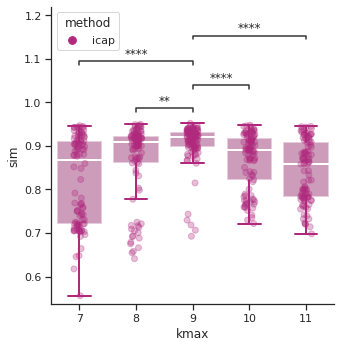

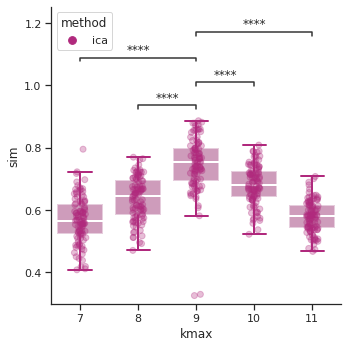

In [20]:
sns.set(style="ticks",  font='sans-serif')
colors=["#b0297dff","#b0297dff"]
fig = plt.figure()

dataframes=dataframe_mtl_icap,dataframe_mtl_ica
for i in range(len(dataframes)):
    plt.figure(i)
    
    g=sns.catplot(y="sim",x="kmax",data=dataframes[i] , kind="box", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=[colors[i]], 
             boxprops=dict(alpha=.5,edgecolor=None),whiskerprops=dict(color=colors[i]), capprops=dict(color=colors[i]), fliersize=0, aspect=1) 


    h=sns.stripplot(y="sim",x="kmax",data=dataframes[i] , hue="method", alpha=.3,
                  size=6, palette=[colors[i]], edgecolor=None,linewidth=1,dodge=True) 
    
    add_stat_annotation(h, data=dataframes[i], x="kmax", y="sim", order=dataframes[i]['kmax'].unique(),
                    box_pairs=[(dataframes[i]['kmax'].unique()[0], dataframes[i]['kmax'].unique()[2]), (dataframes[i]['kmax'].unique()[1], dataframes[i]['kmax'].unique()[2]), (dataframes[i]['kmax'].unique()[2], dataframes[i]['kmax'].unique()[3]),(dataframes[i]['kmax'].unique()[2], dataframes[i]['kmax'].unique()[4])],test='t-test_ind')


In [21]:
%%R -i dataframe_mtl_icap -i dataframe_mtl_ica
library(lme4); library(emmeans); library(car) #library(lmerTest); 
dataframe_mtl_icap$kmax <- factor(dataframe_mtl_icap$kmax) # define kmax as a factor
dataframe_mtl_ica$kmax <- factor(dataframe_mtl_ica$kmax) # define kmax as a factor

# Linear models with kmax as fixed factor:
print("__________________________________________________")
print('linear mixed model for mtl & icap method')
LM_mtl_icap=lmer('sim ~ kmax + (1|perm) ', REML = FALSE,data=dataframe_mtl_icap); 
print(Anova(LM_gva_icap))

print("__________________________________________________")
print('linear mixed model for mtl & ica method')
LM_mtl_ica=lmer('sim ~ kmax + (1|perm) ', REML = FALSE,data=dataframe_mtl_ica); 
print(Anova(LM_mtl_ica))

# Post-hoc
print("###############################")
print("__________________________________________________")
print("Post-hoc results: mtl & icap method")
emm_mtl_icap=emmeans(LM_mtl_icap, ~ kmax ); 
print(pairs(emm_mtl_icap,simple = "kmax",adjust = "fdr"))


print("__________________________________________________")
print("Post-hoc results: mtl & ica method")
emm_mtl_ica=emmeans(LM_mtl_ica, ~ kmax ); #print(pairs(emm,simple = "Groups_continue",adjust = "fdr"))
print(pairs(emm_mtl_ica,simple = "kmax",adjust = "fdr"))

[1] "__________________________________________________"
[1] "linear mixed model for mtl & icap method"
Analysis of Deviance Table (Type II Wald chisquare tests)

Response: sim
      Chisq Df Pr(>Chisq)    
kmax 94.796  4  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "__________________________________________________"
[1] "linear mixed model for mtl & ica method"
Analysis of Deviance Table (Type II Wald chisquare tests)

Response: sim
      Chisq Df Pr(>Chisq)    
kmax 446.38  4  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "###############################"
[1] "__________________________________________________"
[1] "Post-hoc results: mtl & icap method"
 contrast estimate     SE  df t.ratio p.value
 7 - 8    -0.04835 0.0107 404  -4.503  <.0001
 7 - 9    -0.08416 0.0107 404  -7.839  <.0001
 7 - 10   -0.04643 0.0107 404  -4.324  <.0001
 7 - 11   -0.02119 0.0107 404  -1.974  0.0545
 8 - 9    -0.03581 0.0107 

<hr style="border:1px solid black">

# Figure 2 – Robustness (across methods)

## `GVA` dataset

### Components infos Number of voxels + CoM

In [22]:
group_CoM={};nb_voxels={};peak_max={}
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_robustness_gva_ica = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica', 'lthresh':1.6}
params_quant_robustness_gva_icap = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'icap', 'lthresh':1.6}

spine_analysis_robustness_gva = SpineOnlyAnalysis(config,params1=params_quant_robustness_gva_ica,params2=params_quant_robustness_gva_icap)

In [23]:
nb_voxels['gva_ica'],group_CoM['gva_ica'],peak_max['gva_ica']=spine_analysis_robustness_gva.extract_voxels_info(K=5,params=params_quant_robustness_gva_ica) 
nb_voxels['gva_icap'],group_CoM['gva_icap'],peak_max['gva_icap']=spine_analysis_robustness_gva.extract_voxels_info(K=5,params=params_quant_robustness_gva_icap) 


 
gva_ica theshold was put at z= 1.6
Sorting method: rostrocaudal (max value)
 
gva_icap theshold was put at z= 1.6
Sorting method: rostrocaudal (max value)


## `MTL` dataset

### Qualitative evaluation

_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [24]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_robustness_mtl_ica = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'ica', 'lthresh':1.6}
params_quant_robustness_mtl_icap = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'icap', 'lthresh':1.6}

spine_analysis_robustness_mtl = SpineOnlyAnalysis(config,params1=params_quant_robustness_mtl_ica,params2=params_quant_robustness_mtl_icap)

In [25]:
nb_voxels['mtl_ica'],group_CoM['mtl_ica'],peak_max['mtl_ica']=spine_analysis_robustness_mtl.extract_voxels_info(K=9,params=params_quant_robustness_mtl_ica) 
nb_voxels['mtl_icap'],group_CoM['mtl_icap'],peak_max['mtl_icap']=spine_analysis_robustness_mtl.extract_voxels_info(K=9,params=params_quant_robustness_mtl_icap) 

 
mtl_ica theshold was put at z= 1.6
Sorting method: rostrocaudal (max value)
 
mtl_icap theshold was put at z= 1.6
Sorting method: rostrocaudal (max value)


METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_icap at K = 9 

Sorting method: rostrocaudal (max value)
The mean similarity is 0.77 ± 0.1


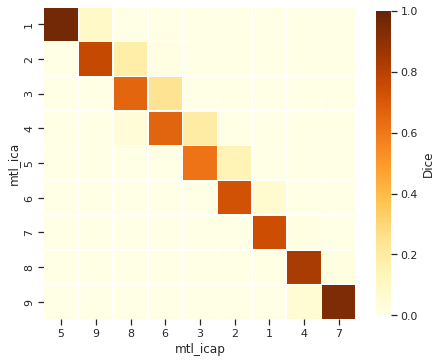

In [26]:
spine_analysis_robustness_mtl.spatial_similarity(k1=9,similarity_method='Dice')

## `ICA` vs `iCAP` 
### Number of voxels

In [27]:
for dataset in ["gva","mtl"]:
    print(">>> "+ dataset+ "_______________________________________")
    K_max= 5 if dataset == "gva" else 9
    for ana in ["ica","icap"]:
        print(" ")
        print(ana + ":")
        for k in range(0,K_max):
            print("nb Voxels for level " + str(k+1) + " "+ str(nb_voxels[dataset + '_' + ana][k]))
        print("mean ± SD " + str(np.round(np.mean(nb_voxels[dataset + '_' + ana]),2)) + " ± " + str(np.round(np.std(nb_voxels[dataset + '_' + ana]),1)))
            

>>> gva_______________________________________
 
ica:
nb Voxels for level 1 2425
nb Voxels for level 2 2275
nb Voxels for level 3 2671
nb Voxels for level 4 2085
nb Voxels for level 5 2241
mean ± SD 2339.4 ± 197.9
 
icap:
nb Voxels for level 1 5139
nb Voxels for level 2 5572
nb Voxels for level 3 5875
nb Voxels for level 4 5537
nb Voxels for level 5 5319
mean ± SD 5488.4 ± 248.8
>>> mtl_______________________________________
 
ica:
nb Voxels for level 1 5680
nb Voxels for level 2 5337
nb Voxels for level 3 5286
nb Voxels for level 4 6017
nb Voxels for level 5 5770
nb Voxels for level 6 6124
nb Voxels for level 7 5708
nb Voxels for level 8 5805
nb Voxels for level 9 5396
mean ± SD 5680.33 ± 276.6
 
icap:
nb Voxels for level 1 5562
nb Voxels for level 2 6389
nb Voxels for level 3 7112
nb Voxels for level 4 7366
nb Voxels for level 5 7900
nb Voxels for level 6 8319
nb Voxels for level 7 8985
nb Voxels for level 8 7754
nb Voxels for level 9 5785
mean ± SD 7241.33 ± 1085.2


In [28]:
for dataset in ["gva","mtl"]:
    print(">>> "+ dataset+ "_______________________________________")
    K_max= 5 if dataset == "gva" else 9
    
    for k in range(0,K_max):
        print("nb Voxels for level " + str(k+1) + " "+ str(abs(nb_voxels[dataset + '_ica'][k]-nb_voxels[dataset + '_icap'][k])))
    print("mean ± SD " + str(np.round(np.mean(nb_voxels[dataset + '_' + ana]),2)) + " ± " + str(np.round(np.std(nb_voxels[dataset + '_' + ana]),1)))


>>> gva_______________________________________
nb Voxels for level 1 2714
nb Voxels for level 2 3297
nb Voxels for level 3 3204
nb Voxels for level 4 3452
nb Voxels for level 5 3078
mean ± SD 5488.4 ± 248.8
>>> mtl_______________________________________
nb Voxels for level 1 118
nb Voxels for level 2 1052
nb Voxels for level 3 1826
nb Voxels for level 4 1349
nb Voxels for level 5 2130
nb Voxels for level 6 2195
nb Voxels for level 7 3277
nb Voxels for level 8 1949
nb Voxels for level 9 389
mean ± SD 7241.33 ± 1085.2


### x,y,z Center of mass (voxels location in PAM50 0.5)

In [29]:
diff_CoM={}
for dataset in ["gva","mtl"]:
    for ana in ["ica","icap"]:
        print(">>>"+dataset+": " +ana+"________")
        K_max= 5 if dataset == "gva" else 9
        
        for k in range(0,K_max):
            print("CoM for level " + str(k+1) + " "+ str(group_CoM[dataset + '_' + ana][k]))

    print(" ")

>>>gva: ica________
CoM for level 1 (31.32701030927835, 24.97319587628866, 159.2379381443299)
CoM for level 2 (30.79208791208791, 28.64087912087912, 140.11120879120878)
CoM for level 3 (30.625982777985772, 26.71546237364283, 114.01684762261326)
CoM for level 4 (30.76786570743405, 25.85707434052758, 89.32661870503597)
CoM for level 5 (29.622489959839356, 25.21017402945114, 65.59036144578313)
>>>gva: icap________
CoM for level 1 (30.06402023740027, 25.645845495232535, 171.2198871375754)
CoM for level 2 (30.883524766690595, 25.663496051687005, 146.3589375448672)
CoM for level 3 (30.163914893617022, 25.846127659574467, 117.69412765957446)
CoM for level 4 (29.87068809824815, 25.861116127867078, 87.06917103124435)
CoM for level 5 (30.057529610829103, 26.060913705583758, 58.06523782665915)
 
>>>mtl: ica________
CoM for level 1 (29.98433098591549, 26.728345070422534, 287.96408450704223)
CoM for level 2 (30.214914746112047, 24.761101742551997, 261.92823683717444)
CoM for level 3 (30.05183503594

### Differences in Z Center of mass

In [30]:
diff_CoM={}
for dataset in ["gva","mtl"]:
    print(">>>"+dataset+": ICA vs iCAP________")
    K_max= 5 if dataset == "gva" else 9
    diff_CoM[dataset]=[0]*K_max
    for k in range(0,K_max):
        diff_CoM[dataset][k]=abs(group_CoM[dataset + "_ica"][k][2] - group_CoM[dataset + "_icap"][k][2])
        #print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM[dataset][k]*0.5,2)) + "mm")
        print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM[dataset][k],2)))  
    
    
    print("mean ± SD " + str(np.round(np.mean(diff_CoM[dataset]),2)) + " ± " + str(np.round(np.std(diff_CoM[dataset]),1)))

    
    print(" ")
    
for ana in ["ica","icap"]:
    print(">>>"+dataset+": mtl vs gva________")

    diff_CoM[ana]=[0]*5
    for k in range(0,K_max):
        diff_CoM[dataset][k]=abs(group_CoM[dataset + "_ica"][k][2] - group_CoM[dataset + "_icap"][k][2])
        #print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM[dataset][k]*0.5,2)) + "mm")
        print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM[dataset][k],2)))  
    
    
    print("mean ± SD " + str(np.round(np.mean(diff_CoM[dataset]),2)) + " ± " + str(np.round(np.std(diff_CoM[dataset]),1)))


>>>gva: ICA vs iCAP________
CoM z for level 1 11.98
CoM z for level 2 6.25
CoM z for level 3 3.68
CoM z for level 4 2.26
CoM z for level 5 7.53
mean ± SD 6.34 ± 3.4
 
>>>mtl: ICA vs iCAP________
CoM z for level 1 0.35
CoM z for level 2 4.44
CoM z for level 3 7.21
CoM z for level 4 7.59
CoM z for level 5 8.41
CoM z for level 6 5.2
CoM z for level 7 1.42
CoM z for level 8 0.08
CoM z for level 9 0.35
mean ± SD 3.89 ± 3.2
 
>>>mtl: mtl vs gva________
CoM z for level 1 0.35
CoM z for level 2 4.44
CoM z for level 3 7.21
CoM z for level 4 7.59
CoM z for level 5 8.41
CoM z for level 6 5.2
CoM z for level 7 1.42
CoM z for level 8 0.08
CoM z for level 9 0.35
mean ± SD 3.89 ± 3.2
>>>mtl: mtl vs gva________
CoM z for level 1 0.35
CoM z for level 2 4.44
CoM z for level 3 7.21
CoM z for level 4 7.59
CoM z for level 5 8.41
CoM z for level 6 5.2
CoM z for level 7 1.42
CoM z for level 8 0.08
CoM z for level 9 0.35
mean ± SD 3.89 ± 3.2


### Peak max (z-value)

In [31]:
for dataset in ["gva","mtl"]:
    print(">>> "+ dataset+ "_______________________________________")
    K_max= 5 if dataset == "gva" else 9
    for ana in ["ica","icap"]:
        print(" ")
        print(ana + ":")
        for k in range(0,K_max):
            print("Peak value for level " + str(k+1) + " "+ str(np.round(peak_max[dataset + '_' + ana][k],1)))
        print("mean ± SD " + str(np.round(np.mean(peak_max[dataset + '_' + ana]),2)) + " ± " + str(np.round(np.std(peak_max[dataset + '_' + ana]),1)))
            

>>> gva_______________________________________
 
ica:
Peak value for level 1 3.0
Peak value for level 2 2.9
Peak value for level 3 2.5
Peak value for level 4 2.7
Peak value for level 5 3.9
mean ± SD 3.02 ± 0.5
 
icap:
Peak value for level 1 3.9
Peak value for level 2 3.7
Peak value for level 3 3.4
Peak value for level 4 3.9
Peak value for level 5 3.7
mean ± SD 3.74 ± 0.2
>>> mtl_______________________________________
 
ica:
Peak value for level 1 4.4
Peak value for level 2 4.0
Peak value for level 3 4.1
Peak value for level 4 3.6
Peak value for level 5 4.0
Peak value for level 6 3.7
Peak value for level 7 3.8
Peak value for level 8 4.0
Peak value for level 9 4.3
mean ± SD 4.0 ± 0.2
 
icap:
Peak value for level 1 5.2
Peak value for level 2 6.0
Peak value for level 3 4.8
Peak value for level 4 4.6
Peak value for level 5 4.4
Peak value for level 6 4.3
Peak value for level 7 4.2
Peak value for level 8 4.5
Peak value for level 9 5.0
mean ± SD 4.77 ± 0.5


<hr style="border:1px solid black">

# Figure 3 – Replicability (across datasets)

## `ICA` method

### Number of voxels

### Center of mass

In [32]:
diff_CoM={}
for ana in ["ica","icap"]:
    print(">>>"+ana+": mtl vs gva________")
    K_max= 5
    diff_CoM[ana]=[0]*K_max
    for k in range(0,K_max):
        diff_CoM[ana][k]=abs(group_CoM["mtl_" + ana][k+4][2] - group_CoM["gva_" + ana][k][2])
        print("CoM z for level " + str(k+5) + " "+ str(np.round(diff_CoM[ana][k],2)) + " vox")  
    print("mean ± SD " + str(np.round(np.mean(diff_CoM[ana]),2)*0.5) + " ± " + str(np.round(np.std(diff_CoM[ana]),1)))

    print(" ")

>>>ica: mtl vs gva________
CoM z for level 5 16.27 vox
CoM z for level 6 7.32 vox
CoM z for level 7 5.6 vox
CoM z for level 8 1.42 vox
CoM z for level 9 6.09 vox
mean ± SD 3.67 ± 4.9
 
>>>icap: mtl vs gva________
CoM z for level 5 12.7 vox
CoM z for level 6 6.27 vox
CoM z for level 7 3.34 vox
CoM z for level 8 0.92 vox
CoM z for level 9 1.09 vox
mean ± SD 2.43 ± 4.4
 


_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

### Quantitative evaluation

In [33]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_replicability_ica_gva = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica', 'lthresh':1.6}
params_quant_replicability_ica_mtl = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'ica', 'lthresh':1.6}

spine_analysis_replicability_ica = SpineOnlyAnalysis(config,params1=params_quant_replicability_ica_gva,params2=params_quant_replicability_ica_mtl)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs mtl_ica at K = 9 

Sorting method: rostrocaudal (max value)
The mean similarity is 0.42 ± 0.1


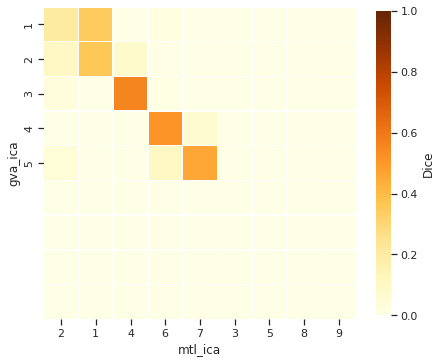

In [34]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_replicability_ica.spatial_similarity(k1=5,k2=9,similarity_method='Dice',save_figure=False)

## `iCAP` method

### Center of mass

In [35]:
print("  ")
print(">>>iCAP ________")
for dataset in ["mtl","gva"]:
    print(">>> " + dataset + " ICA vs iCAP ________")
    K_max= 5 if dataset == "gva" else 9
    diff_CoM[dataset]=[0]*K_max
    for k in range(0,K_max):
        diff_CoM[dataset][k]=abs(group_CoM[dataset + "_ica"][k][2] - group_CoM[dataset + "_icap"][k][2])
        print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM[dataset][k]*0.5,2)) + " mm or " + str(np.round(diff_CoM[dataset][k],2)) + " voxels")
    print("mean ± SD: " +str(np.round(np.mean(diff_CoM[dataset]),2)*0.5) + " ± " + str(np.round(np.std(diff_CoM[dataset]),1)*0.5))


  
>>>iCAP ________
>>> mtl ICA vs iCAP ________
CoM z for level 1 0.18 mm or 0.35 voxels
CoM z for level 2 2.22 mm or 4.44 voxels
CoM z for level 3 3.6 mm or 7.21 voxels
CoM z for level 4 3.79 mm or 7.59 voxels
CoM z for level 5 4.21 mm or 8.41 voxels
CoM z for level 6 2.6 mm or 5.2 voxels
CoM z for level 7 0.71 mm or 1.42 voxels
CoM z for level 8 0.04 mm or 0.08 voxels
CoM z for level 9 0.18 mm or 0.35 voxels
mean ± SD: 1.945 ± 1.6
>>> gva ICA vs iCAP ________
CoM z for level 1 5.99 mm or 11.98 voxels
CoM z for level 2 3.12 mm or 6.25 voxels
CoM z for level 3 1.84 mm or 3.68 voxels
CoM z for level 4 1.13 mm or 2.26 voxels
CoM z for level 5 3.76 mm or 7.53 voxels
mean ± SD: 3.17 ± 1.7


### Quantitative evaluation

In [36]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_replicability_icap_gva = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'icap', 'lthresh':1.6}
params_quant_replicability_icap_mtl = {'k_range':range(9,10), 'dataset':'mtl', 'analysis':'icap', 'lthresh':1.6}

spine_analysis_replicability_icap = SpineOnlyAnalysis(config,params1=params_quant_replicability_icap_gva,params2=params_quant_replicability_icap_mtl)

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 5 vs mtl_icap at K = 9 

Sorting method: rostrocaudal (max value)
The mean similarity is 0.75 ± 0.2


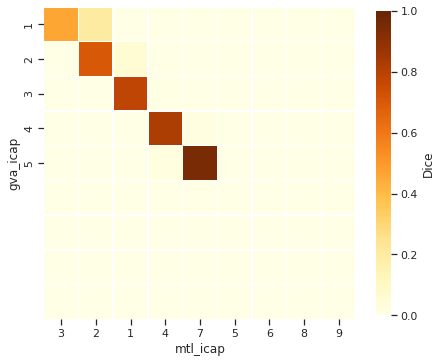

In [37]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_replicability_icap.spatial_similarity(k1=5,k2=9,similarity_method='Dice',save_figure=False)

<hr style="border:1px solid black">

# Figure 4 – Subject-specific

In [38]:
perm_filename=config["main_dir"] + config["output_dir"] + "individual_analyses/dice_indiv_Indiv.csv"#perm_df_paper_10sub.csv"
perm_dataframe=pd.read_csv(perm_filename,delimiter=" ")
dataframe=pd.read_csv(perm_filename,delimiter=" ")

In [39]:
dataframe_gva_ica=dataframe[(dataframe["analysis"]=="ica") & (dataframe["dataset"]=="gva")]
dataframe_gva_icap=dataframe[(dataframe["analysis"]=="icap") & (dataframe["dataset"]=="gva")]
dataframe_mtl_ica=dataframe[(dataframe["analysis"]=="ica") & (dataframe["dataset"]=="mtl")]
dataframe_mtl_icap=dataframe[(dataframe["analysis"]=="icap") & (dataframe["dataset"]=="mtl")]


# Add column with both dataset and methods
dataframe['analysis_dataset'] = dataframe.apply(lambda _: '', axis=1)
for values,index in dataframe.iterrows():#iteritems():
    for method in ["ica","icap"]:
        for dataset in ["gva","mtl"]:
            if dataframe["analysis"][values] == method and dataframe["dataset"][values] ==dataset:
                dataframe["analysis_dataset"][values]= str(method + "_"+  dataset)

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Quantitative evaluation


<Figure size 432x288 with 0 Axes>

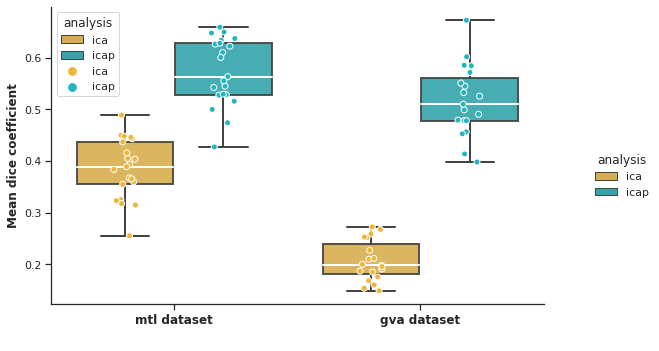

In [40]:
sns.set(style="ticks",  font='sans-serif')
colors=["#72ac3bff","#72ac3bff"]
fig = plt.figure()

colors=['#efb537','#20b5bf'] #'#273248'
sns.set(style="ticks",  font='sans-serif')
g=sns.catplot(y="Dice",x="dataset",data=dataframe, kind="box", hue="analysis", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=colors, 
              boxprops=dict(alpha=.9),fliersize=0, aspect=1) #fliersize=0)
g.fig.set_size_inches(10,5)

sns.stripplot(x="dataset", y="Dice",data=dataframe, hue="analysis",
             size=6, palette=colors, linewidth=1,edgecolor='white',dodge=True)

g.set_axis_labels(" ", "Mean dice coefficient",fontsize=12, fontweight='bold')
g.set_xticklabels(["mtl dataset","gva dataset"],weight='bold',fontsize=12);


In [69]:
%%R -i dataframe
library(lme4); library(emmeans); library(car) #library(lmerTest); 

# Linear models with kmax as fixed factor:
print(" ")
print('linear mixed model for gva & icap method __________________________________________________')
LM=lm('Dice ~ analysis * dataset', data=dataframe); 
print(Anova(LM))

print(" ")
print("Post-hoc results: method __________________________________________________")
emm=emmeans(LM, ~ analysis * dataset); #print(pairs(emm,simple = "Groups_continue",adjust = "fdr"))
print(pairs(emm,simple = "analysis",adjust = "fdr"))

print("Post-hoc results: dataset __________________________________________________")
emm=emmeans(LM, ~ analysis * dataset); #print(pairs(emm,simple = "Groups_continue",adjust = "fdr"))
print(pairs(emm,simple = "dataset",adjust = "fdr"))

[1] " "
[1] "linear mixed model for gva & icap method __________________________________________________"
Anova Table (Type II tests)

Response: Dice
                  Sum Sq Df F value    Pr(>F)    
analysis         1.21055  1 350.586 < 2.2e-16 ***
dataset          0.27374  1  79.278 2.040e-13 ***
analysis:dataset 0.07614  1  22.050 1.155e-05 ***
Residuals        0.26242 76                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] " "
[1] "Post-hoc results: method __________________________________________________"
dataset = gva:
 contrast   estimate     SE df t.ratio p.value
 ica - icap   -0.311 0.0191 76 -16.307  <.0001

dataset = mtl:
 contrast   estimate     SE df t.ratio p.value
 ica - icap   -0.187 0.0181 76 -10.330  <.0001

[1] "Post-hoc results: dataset __________________________________________________"
analysis = ica:
 contrast  estimate     SE df t.ratio p.value
 gva - mtl  -0.1789 0.0186 76  -9.616  <.0001

analysis = icap:
 contrast  est

In [54]:
print("icap - mtl : mean ± SD " + str(np.round(np.mean(dataframe_mtl_icap["Dice"]),2)) + " ± " + str(np.round(np.std(dataframe_mtl_icap["Dice"]),1)))
print("ica - mtl : mean ± SD " + str(np.round(np.mean(dataframe_mtl_ica["Dice"]),2)) + " ± " + str(np.round(np.std(dataframe_mtl_ica["Dice"]),1)))
print("icap - gva : mean ± SD " + str(np.round(np.mean(dataframe_gva_icap["Dice"]),2)) + " ± " + str(np.round(np.std(dataframe_gva_icap["Dice"]),1)))
print("ica - gva : mean ± SD " + str(np.round(np.mean(dataframe_gva_ica["Dice"]),2)) + " ± " + str(np.round(np.std(dataframe_gva_ica["Dice"]),1)))


icap - mtl : mean ± SD 0.57 ± 0.1
ica - mtl : mean ± SD 0.38 ± 0.1
icap - gva : mean ± SD 0.52 ± 0.1
ica - gva : mean ± SD 0.21 ± 0.0


### `MTL` dataset

Sorting method: rostrocaudal (center-of-mass biggest cluster)
The plotting will be displayed in neurological orientation (Left > Right)


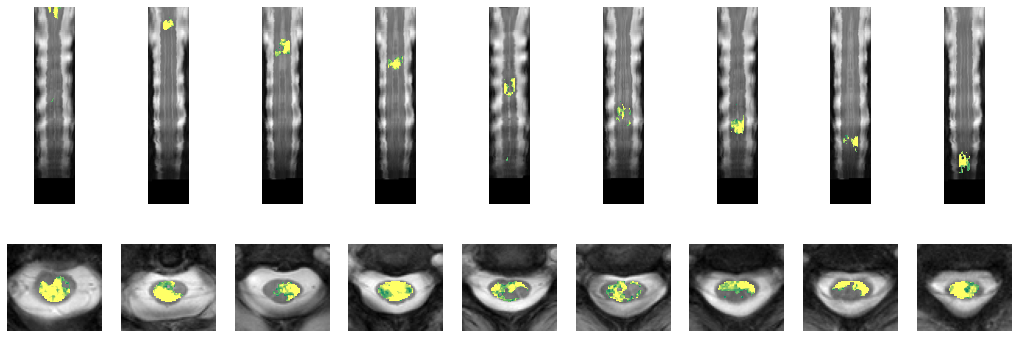

In [17]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis

subject = 'A011'
params_qual_1 = {'k':9, 'dataset':'mtl', 'analysis':'icap','lthresh':1.6}   
params_qual_2 = {'k':9, 'dataset':'mtl', 'analysis':'icap', 'subject':subject,'lthresh':1.6}   

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2,sorting_method='rostrocaudal_CoM')
#plotting = Plotting(config,'spinalcord',params1=params_qual_1,sorting_method='rostrocaudal_CoM')
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.6, uthresh=3.5, template=config['main_dir']+'spine_only/mtl/sub-'+subject+'/sub-'+subject+'_T2w_coreg_in_PAM50_resampled.nii.gz', colormap_two=['gray','winter'], save_results=False)

The plotting will be display in neurological orientation (Left > Right)


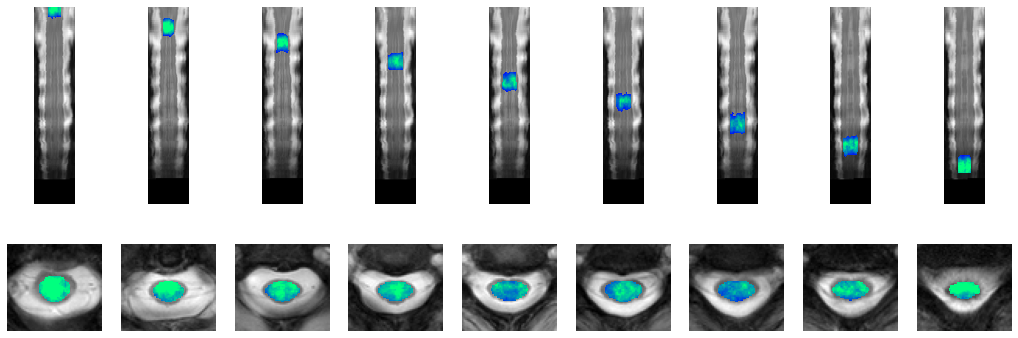

In [22]:
plotting = Plotting(config,'spinalcord',params1=params_qual_1,sorting_method='rostrocaudal_CoM')
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.6, uthresh=4, template=config['main_dir']+'spine_only/mtl/sub-'+subject+'/sub-'+subject+'_T2w_coreg_in_PAM50_resampled.nii.gz', colormap_one='winter', save_results=False)

## Heatmap of the distribution

In [78]:
nb_voxels_distr={};CoM__distr={}
redo_distribution_map=True
if redo_distribution_map==True:
    for dataset in ["gva","mtl"]:
        for ana in ["icap","ica"]:
            params_heat_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':ana,'lthresh':1.6}   
            spine_analysis = SpineOnlyAnalysis(config,params1=params_heat_1,params2=params_heat_1,load_subjects=True)
            spine_analysis.subject_distribution(spine_analysis.name1, k=params_heat_1['k_range'][0])
            
            nb_voxels_distr[dataset + '_' + ana], CoM__distr[dataset + '_' + ana]=spine_analysis.extract_voxels_info(K=9 if dataset == 'mtl' else 5,params=params_heat_1,lthresh=5,subject_distribution=True) 


            
            

Subject loading for gva_icap...
Subject loading for gva_icap2...
SUBJECT DISTRIBUTION FOR 
 ––– Set: gva_icap 
 ––– K: 5
...Sorting and binarizing individual maps
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (center-of-mass biggest cluster)
Sorting method: rostrocaudal (c

### Compared distribution CoM with the CoM of the group components

In [85]:
for dataset in ["gva","mtl"]:
    for ana in ["icap","ica"]:
        K_max= 5 if dataset == "gva" else 9
        print(dataset + "_" + ana)
        for k in range(0,K_max):
            print(CoM__distr[dataset + '_' + ana][k][2])

gva_icap
(29.772559543777255, 25.54679637705468, 169.5689365984569)
(30.829749369716744, 25.269464629986654, 145.2500370754857)
(30.58381971465629, 26.267023346303503, 117.78258754863813)
(30.226964769647697, 25.568766937669377, 88.10535230352303)
(30.045403134593634, 26.13039263208919, 60.41864598481176)
gva_ica
(30.788793103448278, 26.735632183908045, 171.3466235632184)
(30.2280585106383, 24.55651595744681, 142.89361702127658)
(32.350028137310076, 26.831738885762523, 131.3252673044457)
(30.636678200692042, 22.876124567474047, 114.46782006920415)
(30.071487263763352, 25.86277732128184, 78.97904683648315)
mtl_icap
(29.95581947743468, 26.591607284243864, 286.87854315122723)
(30.529766487041314, 25.457146522966383, 265.1386964331537)
(29.995961852392817, 25.298479250794742, 236.5465246155168)
(29.648994374662866, 25.89311859443631, 203.0930877706712)
(29.805105633802818, 25.55625, 173.6281690140845)
(29.968275862068964, 25.47783251231527, 145.89822660098523)
(30.025969827586206, 25.78415

In [72]:
print(">>>'mtl': ICA vs iCAP________")
diff_CoM_mtl=[0]*9;diff_CoM_gva=[0]*5
for k in range(0,5):
    diff_CoM_mtl[k]=abs(CoM_mtl_ica[k][2] - CoM_mtl_icap[k][2])
    print("CoM z for level " + str(k+1) + " "+ str(np.round(diff_CoM_mtl[k]*0.5,2)) + "mm")
print("mean ± SD " + str(np.round(np.mean(diff_CoM_mtl),2)*0.5) + " ± " + str(np.round(np.std(diff_CoM_mtl),1)*0.5))


[(30.06402023740027, 25.645845495232535, 171.2198871375754),
 (30.883524766690595, 25.663496051687005, 146.3589375448672),
 (30.163914893617022, 25.846127659574467, 117.69412765957446),
 (29.87068809824815, 25.861116127867078, 87.06917103124435),
 (30.057529610829103, 26.060913705583758, 58.06523782665915)]

In [38]:
nb_voxels_gva_icap #,
CoM_gva_icap

[(30.06402023740027, 25.645845495232535, 171.2198871375754),
 (30.883524766690595, 25.663496051687005, 146.3589375448672),
 (30.163914893617022, 25.846127659574467, 117.69412765957446),
 (29.87068809824815, 25.861116127867078, 87.06917103124435),
 (30.057529610829103, 26.060913705583758, 58.06523782665915)]

Sorting method: no_sorting
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: no_sorting
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: no_sorting
The plotting will be displayed in neurological orientation (Left > Right)
Sorting method: no_sorting
The plotting will be displayed in neurological orientation (Left > Right)


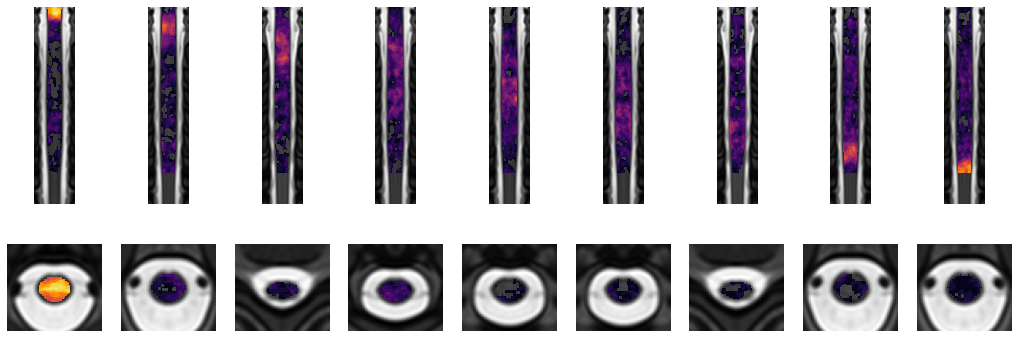

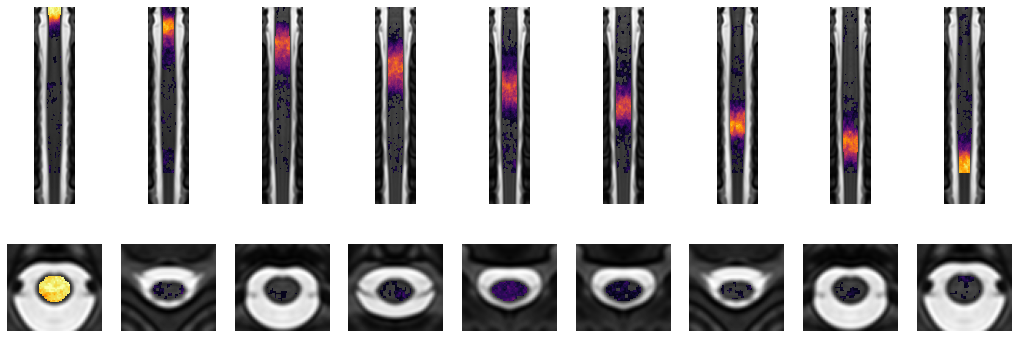

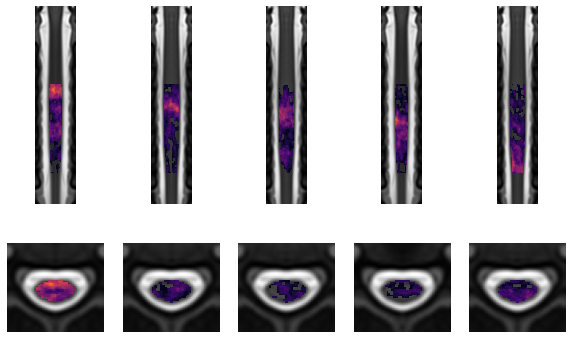

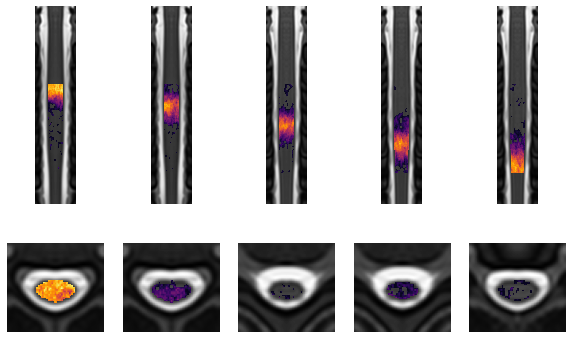

In [4]:
            
save_plots=True
for dataset in ["mtl","gva"]:
    for ana in ["ica","icap"]:
        config["output_tag"]= "Distribution"
        config["data"][dataset][ana]["spinalcord"]["tag_filename"]=".nii.gz"
        params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':ana, 'subject':"distribution"}
        plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None,sorting_method='no_sorting')
        plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1['k'], lthresh=0, uthresh=len(config["list_subjects"][dataset]), save_results=save_plots,colormap_one='inferno')

#with open('../config/config_spine_only_NK.json') as config_file:
 #   config = json.load(config_file)

In [120]:
dataframe={};dataframe_comp={}
extract=True # put extract=True to extract the values 
for dataset in ["mtl","gva"]:
    dataframe[dataset]={};dataframe_comp[dataset]={}
    for ana in ["ica","icap"]:
        dataframe[dataset][ana]={};dataframe_comp[dataset][ana]={}
        for measure in ["Dice"]:
            config["output_dir"]= "/spine_only/results/individual_analyses/" + dataset + "/"+measure+"/"
            config["output_tag"]= "Indiv"
            
            if extract == True:
                params_quant_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':ana, 'lthresh':1.6}

                for sub in config['list_subjects'][dataset]:
                    params_quant_2 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)), 'dataset':dataset, 'analysis':ana, 'subject':'sub-'+sub, 'lthresh':1.6}

                spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2,load_subjects=True)
                print(params_quant_1["k_range"][0])
                spine_analysis.spatial_similarity(k1=params_quant_1["k_range"][0],k2=params_quant_2["k_range"][0],similarity_method='Dice',save_results=True,save_figure=False)

            input_comp= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*indiv_comp.txt")[0]
            input= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*indiv.txt")[0]
            
            dataframe_comp[dataset][ana][measure]=pd.read_csv(input_comp, header=0,sep=' ')
            dataframe[dataset][ana][measure]=pd.read_csv(input, header=0,sep=' ')
            
frames=[dataframe["mtl"]["ica"]["Dice"],dataframe["gva"]["ica"]["Dice"],dataframe["mtl"]["icap"]["Dice"],dataframe["gva"]["icap"]["Dice"]]; frames=pd.concat(frames)
frames_comp=[dataframe_comp["mtl"]["ica"]["Dice"],dataframe_comp["gva"]["ica"]["Dice"],dataframe_comp["mtl"]["icap"]["Dice"],dataframe_comp["gva"]["icap"]["Dice"]] ; frames_comp=pd.concat(frames_comp)

Subject loading for mtl_ica...
9
METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_ica2 at K = 9 

Sorting method: rostrocaudal (max value)
Subject loading for mtl_icap...
9
METHOD 1: Comparing two sets of components at specific K values 
mtl_icap at K = 9 vs mtl_icap2 at K = 9 

Sorting method: rostrocaudal (max value)
Subject loading for gva_ica...
5
METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 5 vs gva_ica2 at K = 5 

Sorting method: rostrocaudal (max value)
Subject loading for gva_icap...
5
METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 5 vs gva_icap2 at K = 5 

Sorting method: rostrocaudal (max value)


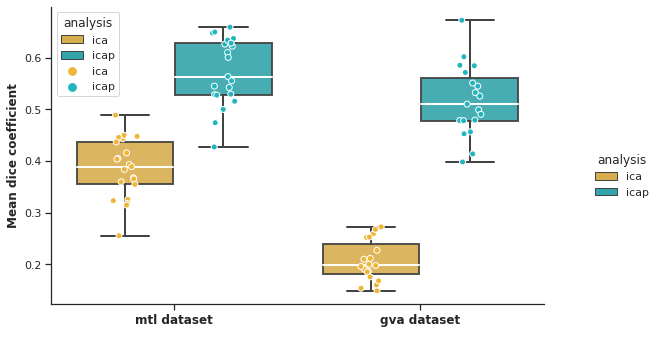

In [121]:
#frames=[dataframe["mtl"]["ica"]["Dice"],dataframe["gva"]["ica"]["Dice"]]; frames=pd.concat(frames)

import seaborn as sns
colors=['#efb537','#20b5bf'] #'#273248'
sns.set(style="ticks",  font='sans-serif')
g=sns.catplot(y="Dice",x="dataset",data=frames, kind="box", hue="analysis", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=colors, 
              boxprops=dict(alpha=.9),fliersize=0, aspect=1) #fliersize=0)
g.fig.set_size_inches(10,5)

sns.stripplot(x="dataset", y="Dice",data=frames, hue="analysis",
             size=6, palette=colors, linewidth=1,edgecolor='white',dodge=True)

g.set_axis_labels(" ", "Mean dice coefficient",fontsize=12, fontweight='bold')
g.set_xticklabels(["mtl dataset","gva dataset"],weight='bold',fontsize=12);


